# 1. Data input and cleaning

In [15]:
# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored. 
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir); 
# Load the WGCNA package
library(WGCNA);
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
#Read in the female liver data set
expData = read.csv("./data/avrRps4_counts.csv", row.names="target_id");

[1] "/home/ezy/projects/WGCNA_avrRps4"

In [16]:
datExpr0 = as.data.frame(t(expData[,]));

In [17]:
gsg = goodSamplesGenes(datExpr0, verbose = 3);

 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 2035 genes from the calculation due to too many missing samples or zero variance.
  ..step 2


In [18]:
if (!gsg$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg$goodGenes)>0)
# printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
if (sum(!gsg$goodSamples)>0)
# printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}

In [19]:
# missing이 많은 유전자 개수
length(names(datExpr0)[!gsg$goodGenes])

[1] 2035

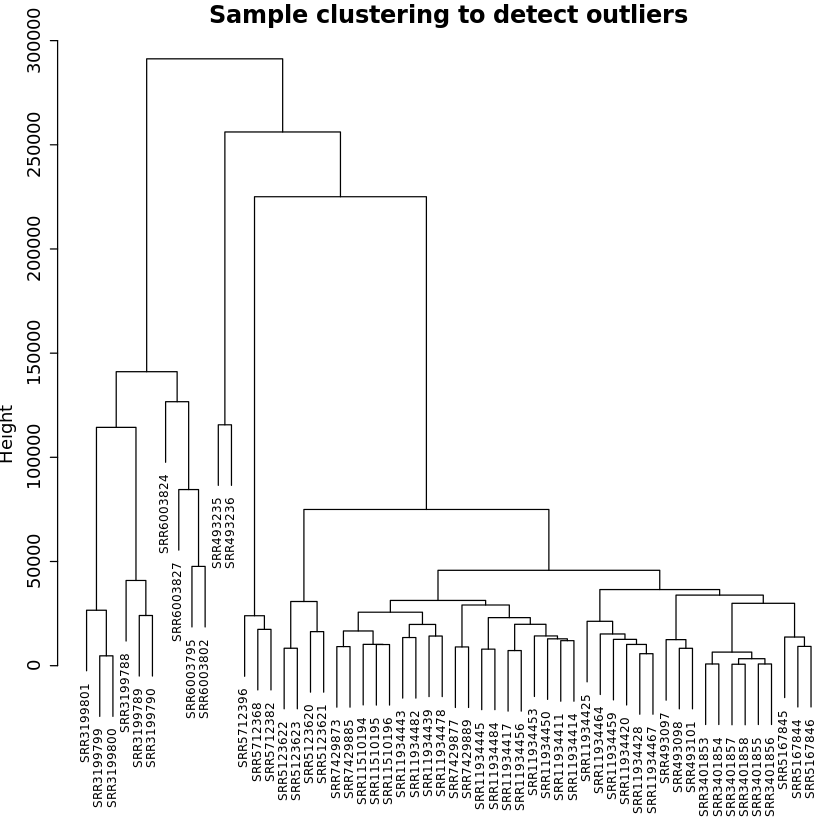

In [20]:
sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.
# sizeGrWindow(12,9)
# pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5, 
     cex.axis = 1.5, cex.main = 2)

In [21]:
# 딱히 모난 샘플이 없어서 걸러낸 샘플 0
datExpr = datExpr0
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

In [22]:
traitData = read.csv("./data/avrRps4SampleInfo.csv");

In [23]:
allTraits = traitData[,];

In [24]:
avrRps4Samples = rownames(datExpr);
traitRows = match(avrRps4Samples, allTraits$run);

In [25]:
datTraits = allTraits[traitRows, -1];

In [26]:
rownames(datTraits) = allTraits[traitRows, 1];

In [27]:
collectGarbage();

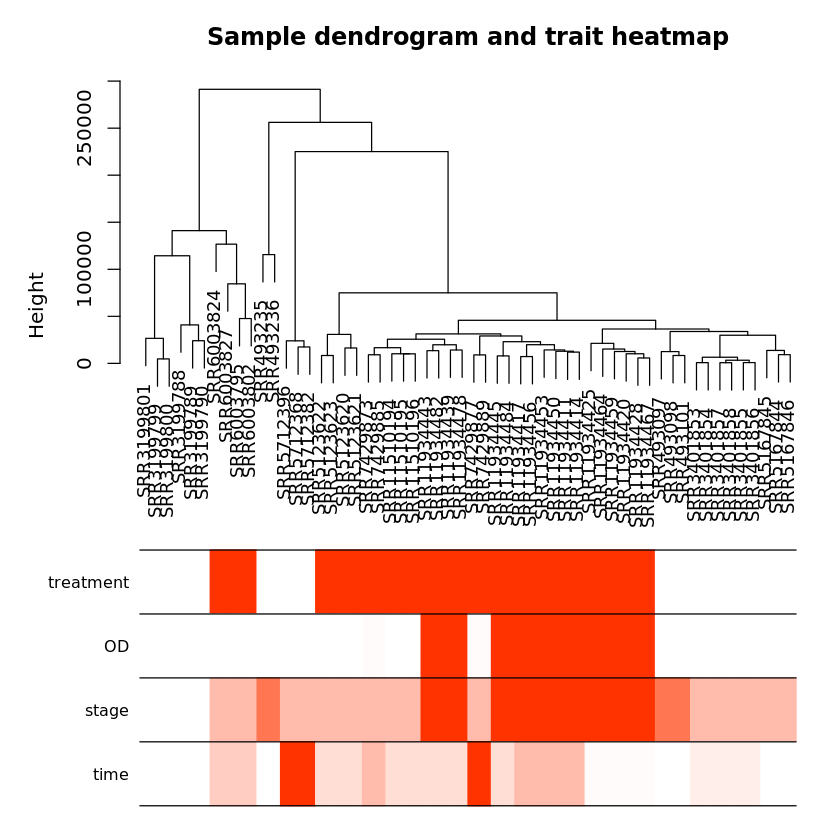

In [28]:
# Re-cluster samples
sampleTree2 = hclust(dist(datExpr), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors = numbers2colors(datTraits, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.
plotDendroAndColors(sampleTree2, traitColors,
                    groupLabels = names(datTraits), 
                    main = "Sample dendrogram and trait heatmap")


In [29]:
save(datExpr, datTraits, file = "AvrRps4-01-dataInput.RData")

------

# 2.a Automatic network construction and module detection

pickSoftThreshold: will use block size 925.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 925 of 48359


Warning message:
“executing %dopar% sequentially: no parallel backend registered”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 1 : 925 .”


   ..working on genes 926 through 1850 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 926 : 1850 .”


   ..working on genes 1851 through 2775 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 1851 : 2775 .”


   ..working on genes 2776 through 3700 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 2776 : 3700 .”


   ..working on genes 3701 through 4625 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 3701 : 4625 .”


   ..working on genes 4626 through 5550 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 4626 : 5550 .”


   ..working on genes 5551 through 6475 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 5551 : 6475 .”


   ..working on genes 6476 through 7400 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 6476 : 7400 .”


   ..working on genes 7401 through 8325 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 7401 : 8325 .”


   ..working on genes 8326 through 9250 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 8326 : 9250 .”


   ..working on genes 9251 through 10175 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 9251 : 10175 .”


   ..working on genes 10176 through 11100 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 10176 : 11100 .”


   ..working on genes 11101 through 12025 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 11101 : 12025 .”


   ..working on genes 12026 through 12950 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 12026 : 12950 .”


   ..working on genes 12951 through 13875 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 12951 : 13875 .”


   ..working on genes 13876 through 14800 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 13876 : 14800 .”


   ..working on genes 14801 through 15725 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 14801 : 15725 .”


   ..working on genes 15726 through 16650 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 15726 : 16650 .”


   ..working on genes 16651 through 17575 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 16651 : 17575 .”


   ..working on genes 17576 through 18500 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 17576 : 18500 .”


   ..working on genes 18501 through 19425 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 18501 : 19425 .”


   ..working on genes 19426 through 20350 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 19426 : 20350 .”


   ..working on genes 20351 through 21275 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 20351 : 21275 .”


   ..working on genes 21276 through 22200 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 21276 : 22200 .”


   ..working on genes 22201 through 23125 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 22201 : 23125 .”


   ..working on genes 23126 through 24050 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 23126 : 24050 .”


   ..working on genes 24051 through 24975 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 24051 : 24975 .”


   ..working on genes 24976 through 25900 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 24976 : 25900 .”


   ..working on genes 25901 through 26825 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 25901 : 26825 .”


   ..working on genes 26826 through 27750 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 26826 : 27750 .”


   ..working on genes 27751 through 28675 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 27751 : 28675 .”


   ..working on genes 28676 through 29600 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 28676 : 29600 .”


   ..working on genes 29601 through 30525 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 29601 : 30525 .”


   ..working on genes 30526 through 31450 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 30526 : 31450 .”


   ..working on genes 31451 through 32375 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 31451 : 32375 .”


   ..working on genes 32376 through 33300 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 32376 : 33300 .”


   ..working on genes 33301 through 34225 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 33301 : 34225 .”


   ..working on genes 34226 through 35150 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 34226 : 35150 .”


   ..working on genes 35151 through 36075 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 35151 : 36075 .”


   ..working on genes 36076 through 37000 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 36076 : 37000 .”


   ..working on genes 37001 through 37925 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 37001 : 37925 .”


   ..working on genes 37926 through 38850 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 37926 : 38850 .”


   ..working on genes 38851 through 39775 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 38851 : 39775 .”


   ..working on genes 39776 through 40700 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 39776 : 40700 .”


   ..working on genes 40701 through 41625 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 40701 : 41625 .”


   ..working on genes 41626 through 42550 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 41626 : 42550 .”


   ..working on genes 42551 through 43475 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 42551 : 43475 .”


   ..working on genes 43476 through 44400 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 43476 : 44400 .”


   ..working on genes 44401 through 45325 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 44401 : 45325 .”


   ..working on genes 45326 through 46250 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 45326 : 46250 .”


   ..working on genes 46251 through 47175 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 46251 : 47175 .”


   ..working on genes 47176 through 48100 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 47176 : 48100 .”


   ..working on genes 48101 through 48359 of 48359


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 48101 : 48359 .”


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.113  0.551         -0.128  7270.0   7260.00  13400
2      2    0.218 -0.457          0.849  2270.0   1990.00   6460
3      3    0.644 -1.260          0.928  1000.0    789.00   3870
4      4    0.734 -1.510          0.951   539.0    385.00   2610
5      5    0.763 -1.650          0.959   329.0    216.00   1890
6      6    0.778 -1.720          0.966   218.0    129.00   1440
7      7    0.775 -1.760          0.966   154.0     80.40   1130
8      8    0.770 -1.770          0.961   113.0     53.00    909
9      9    0.768 -1.750          0.953    86.9     36.40    743
10    10    0.772 -1.670          0.930    68.5     25.40    615
11    12    0.887 -1.480          0.956    45.8     13.10    461
12    14    0.867 -1.560          0.913    33.1      6.93    426
13    16    0.880 -1.560          0.900    25.3      3.87    397
14    18    0.909 -1.490          0.906    20.3      2.27    373
15    20    0.909 -1.460 

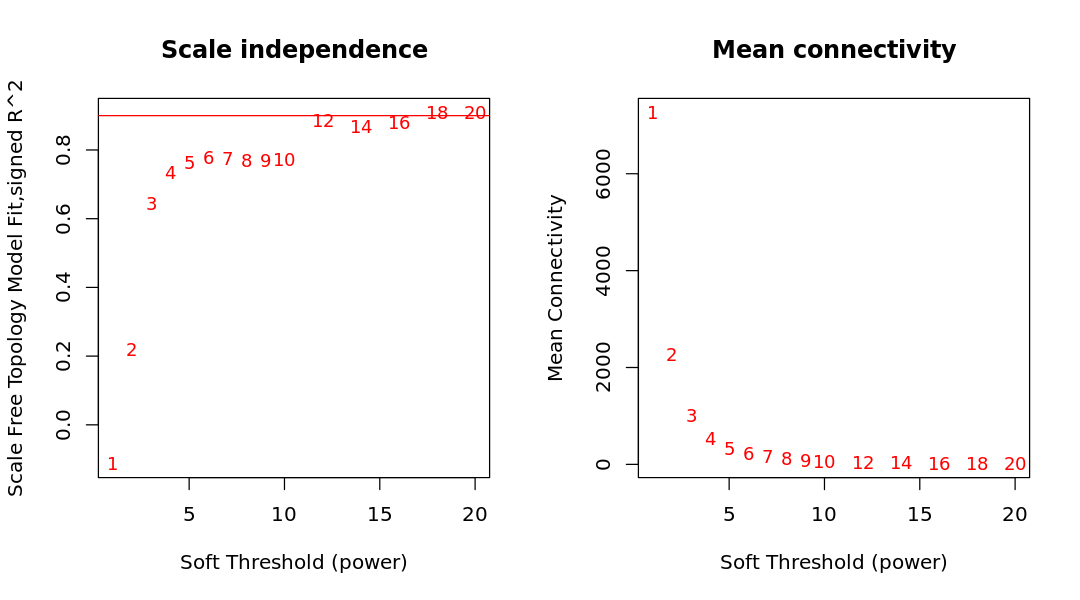

In [49]:
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
options(repr.plot.width=9, repr.plot.height=5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

In [30]:
softPower = 6;
adjacency = adjacency(datExpr, power = softPower);

In [31]:
# Turn adjacency into topological overlap
TOM = TOMsimilarity(adjacency);
dissTOM = 1-TOM

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


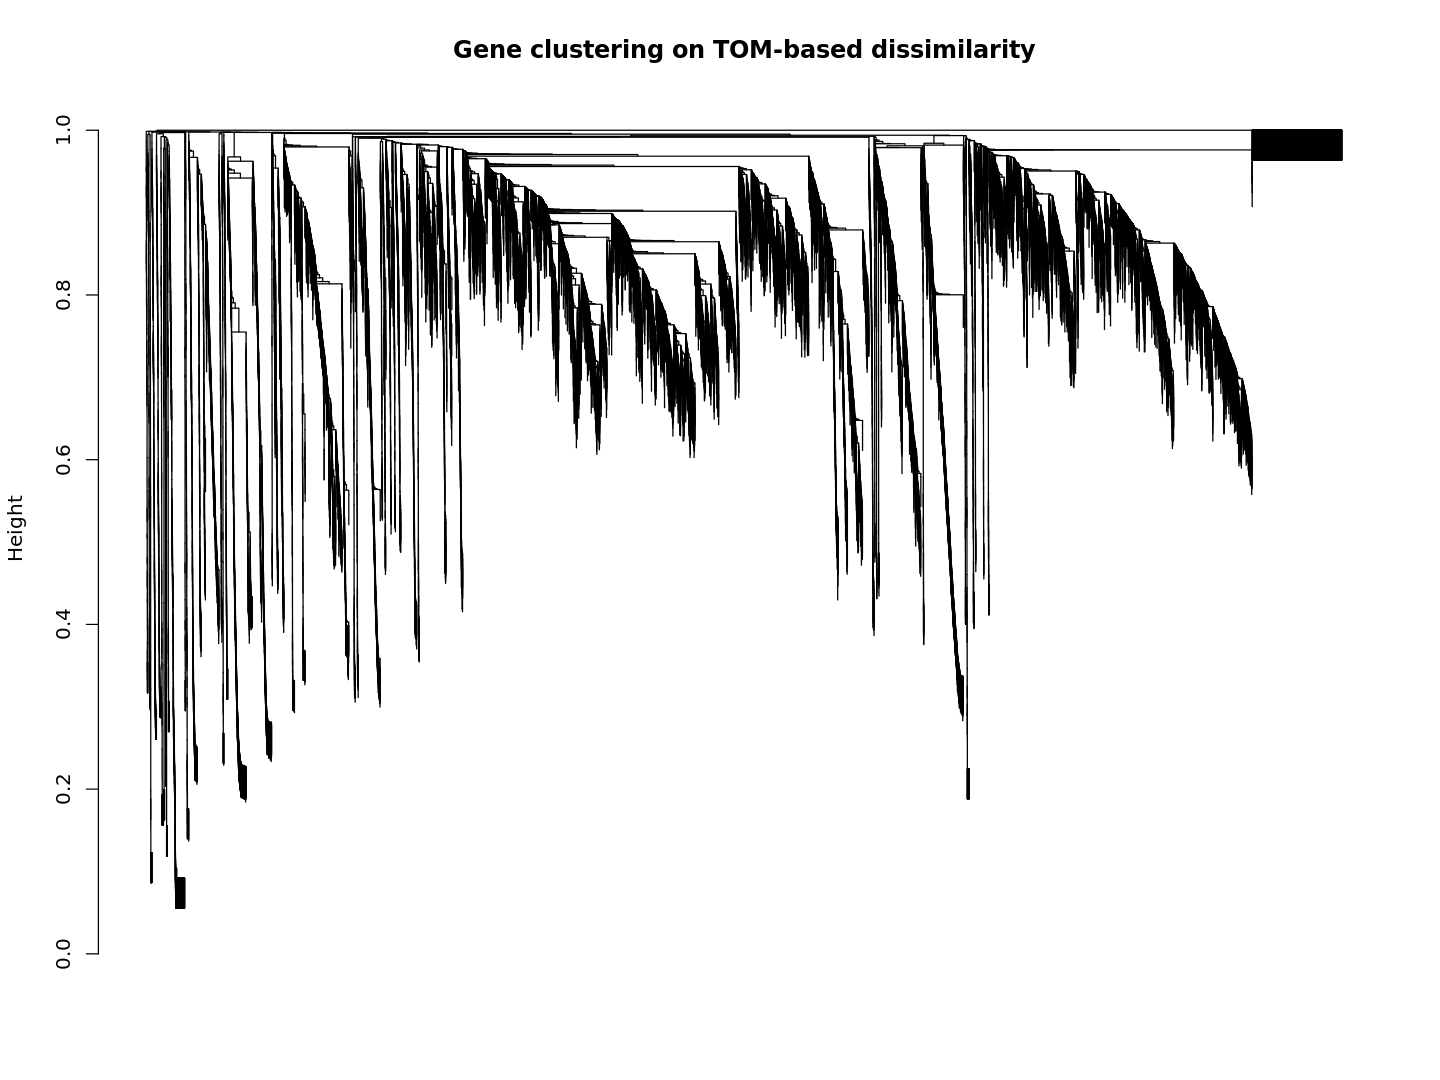

In [32]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");
# Plot the resulting clustering tree (dendrogram)
options(repr.plot.width=12, repr.plot.height=9)
plot(geneTree, xlab="", sub="", main="Gene clustering on TOM-based dissimilarity",
    labels=FALSE, hang=0.04);

In [33]:
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 30;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                deepSplit = 2, pamRespectsDendro = FALSE,
                minClusterSize = minModuleSize);
table(dynamicMods)

 ..cutHeight not given, setting it to 0.994  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
2018 2951 2079 1595 1501 1403 1122 1000  900  837  817  808  691  524  497  427 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 393  388  370  369  355  316  286  253  230  223  199  188  182  178  167  166 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 160  159  145  140  137  135  122  120  119  117  111  106  103  103   89   82 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
  80   78   77   75   71   71   66   64   64   63   60   60   59   59   58   57 
  64   65   66   67   68   69   70   71   72   73   74 
  55   54   51   50   50   42   37   37   36   35   33 

dynamicColors
  antiquewhite4         bisque4           black            blue           brown 
             59              82            1000            2079            1595 
         brown4          coral1          coral2            cyan       darkgreen 
             89              59              58             497             286 
       darkgrey     darkmagenta  darkolivegreen darkolivegreen4      darkorange 
            230             145             159              33             199 
    darkorange2         darkred   darkseagreen4   darkslateblue   darkturquoise 
            103             316              60              80             253 
     firebrick4     floralwhite           green     greenyellow            grey 
             35             103            1403             808            2018 
         grey60       honeydew1      indianred4           ivory  lavenderblush3 
            388              60              36             106              63 
     lightcora

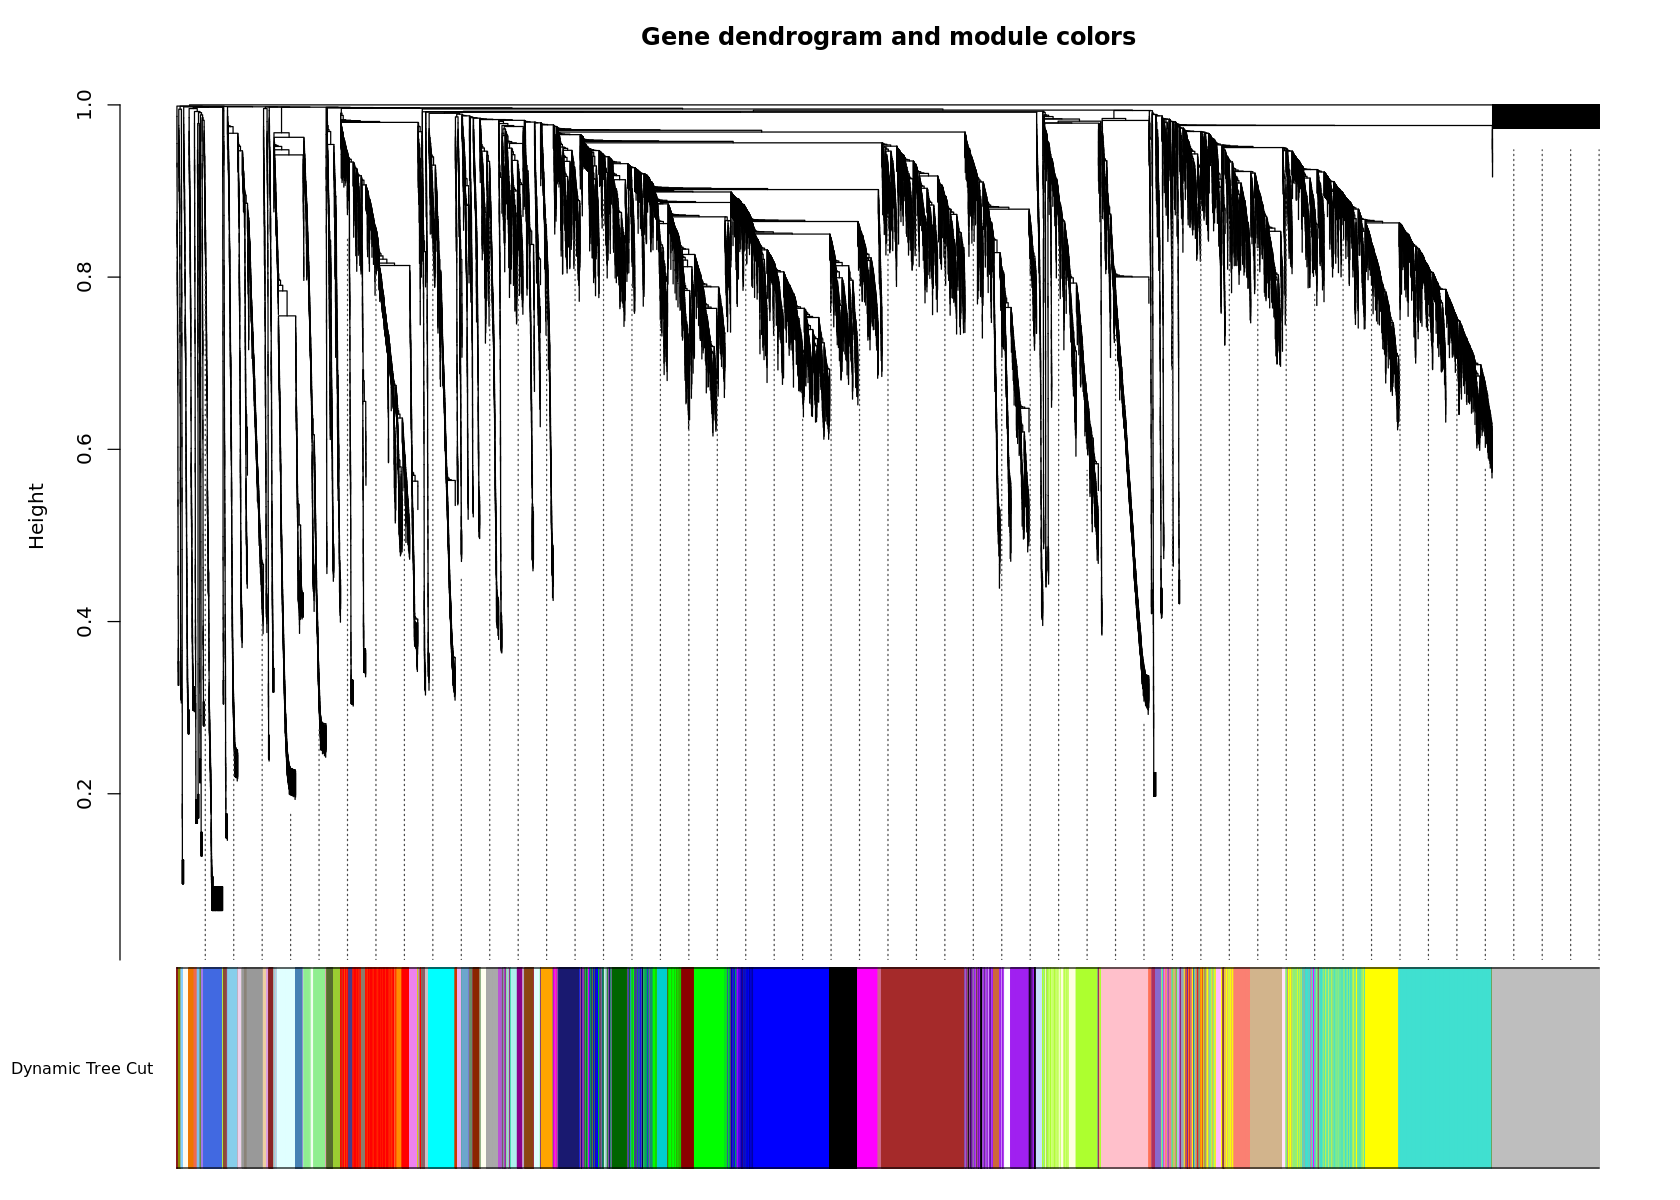

In [34]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
options(repr.plot.width=14, repr.plot.height=10)
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")

write.csv(table(dynamicColors), 'module_count.csv', row.names=FALSE)

 mergeCloseModules: Merging modules whose distance is less than 0
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 75 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 75 module eigengenes in given set.
      ..principal component calculation for module grey failed with the following error:
           Error in svd(datModule, nu = min(n, p, nPC), nv = min(n, p, nPC)) : 
  infinite or missing values in 'x'
       ..hub genes will be used instead of principal components.


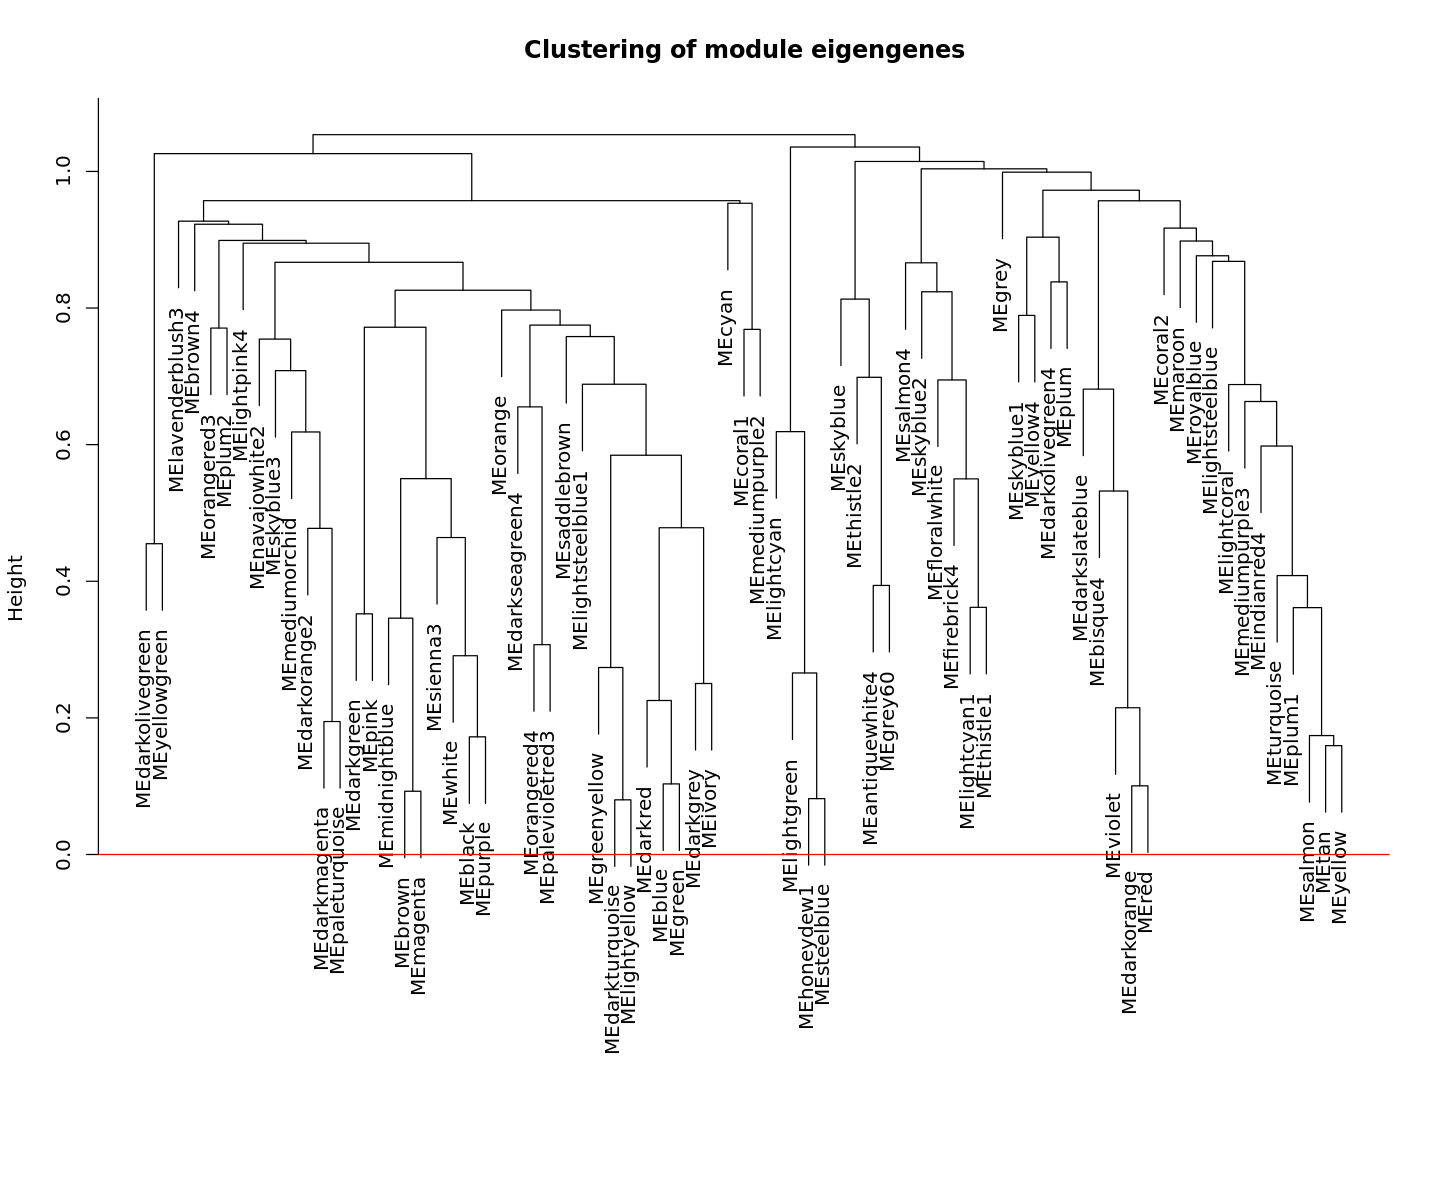

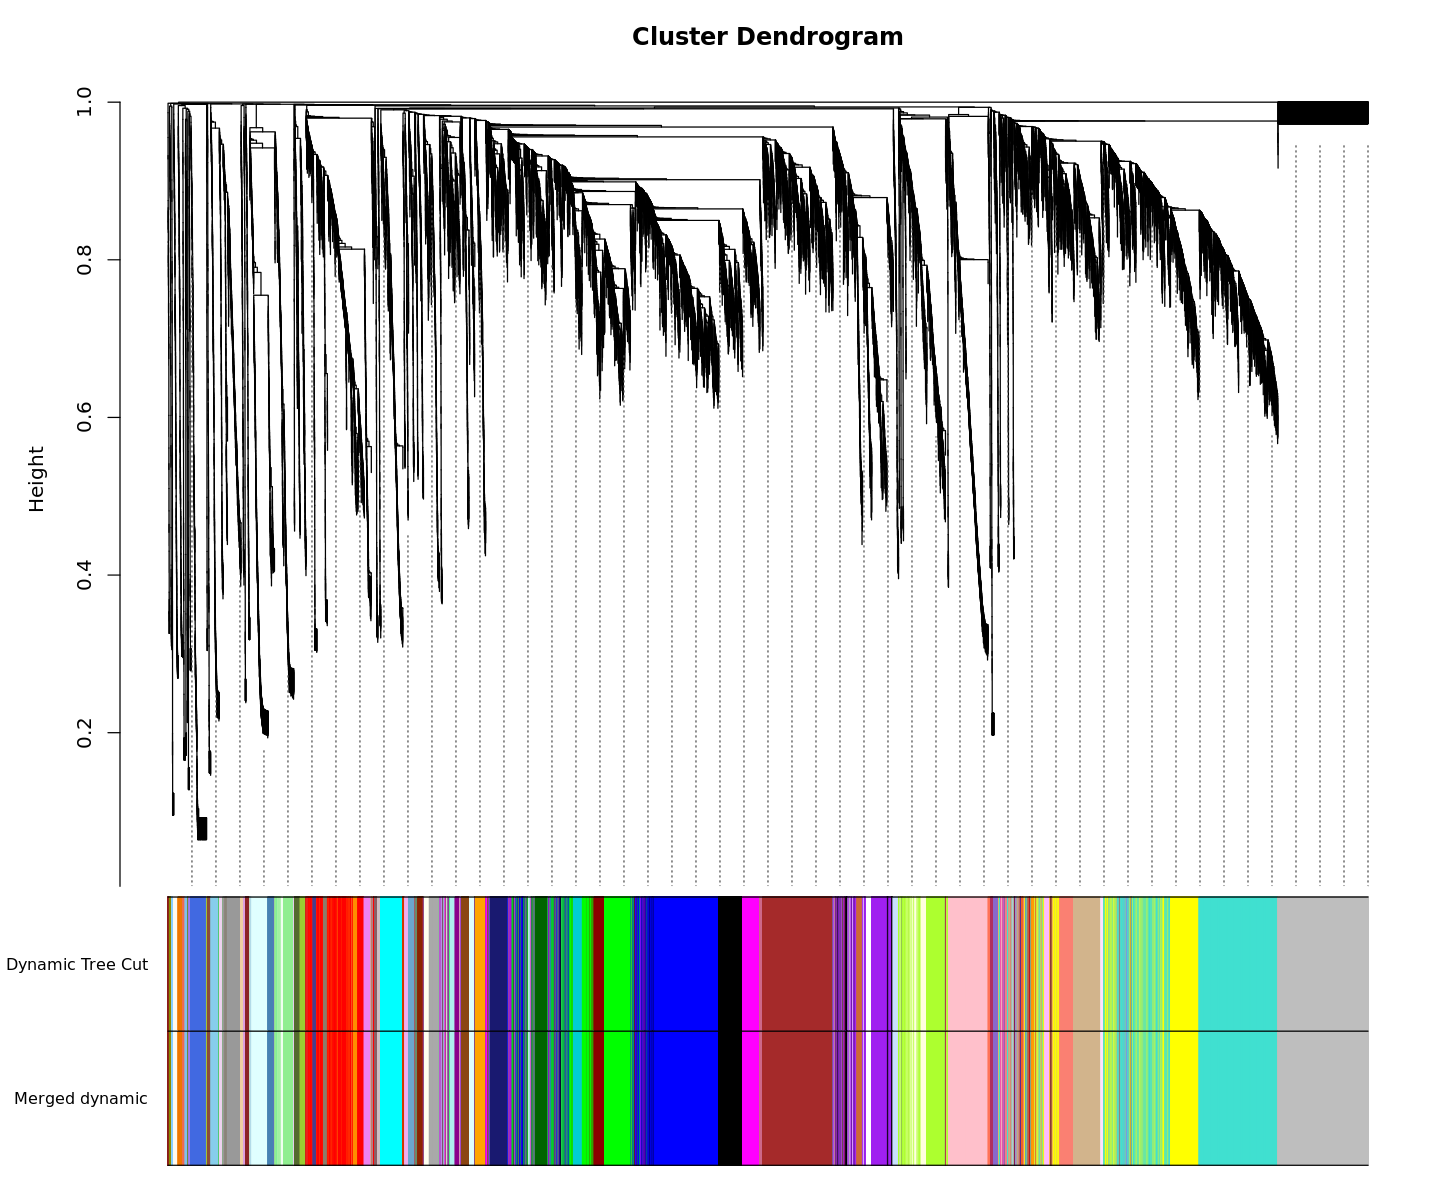

In [53]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
options(repr.plot.width=12, repr.plot.height=10)
plot(METree, main = "Clustering of module eigengenes",
     xlab = "", sub = "")

MEDissThres = 0
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")
# Call an automatic merging function
merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;
options(repr.plot.width=12, repr.plot.height=10)
#pdf(file = "Plots/geneDendro-3.pdf", wi = 9, he = 6)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
#dev.off()

In [54]:
# Rename to moduleColors
moduleColors = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels = match(moduleColors, colorOrder)-1;
MEs = mergedMEs;
# Save module colors and labels for use in subsequent parts
save(MEs, moduleLabels, moduleColors, geneTree, file = "AvrRps4-02-networkConstruction-stepByStep.RData")

-----

# 3. Relating modules to external information and identifying important genes

In [55]:
# Define numbers of genes and samples
nGenes = ncol(datExpr);
nSamples = nrow(datExpr);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(datExpr, moduleColors)$eigengenes
MEs = orderMEs(MEs0)
moduleTraitCor = cor(MEs, datTraits, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);

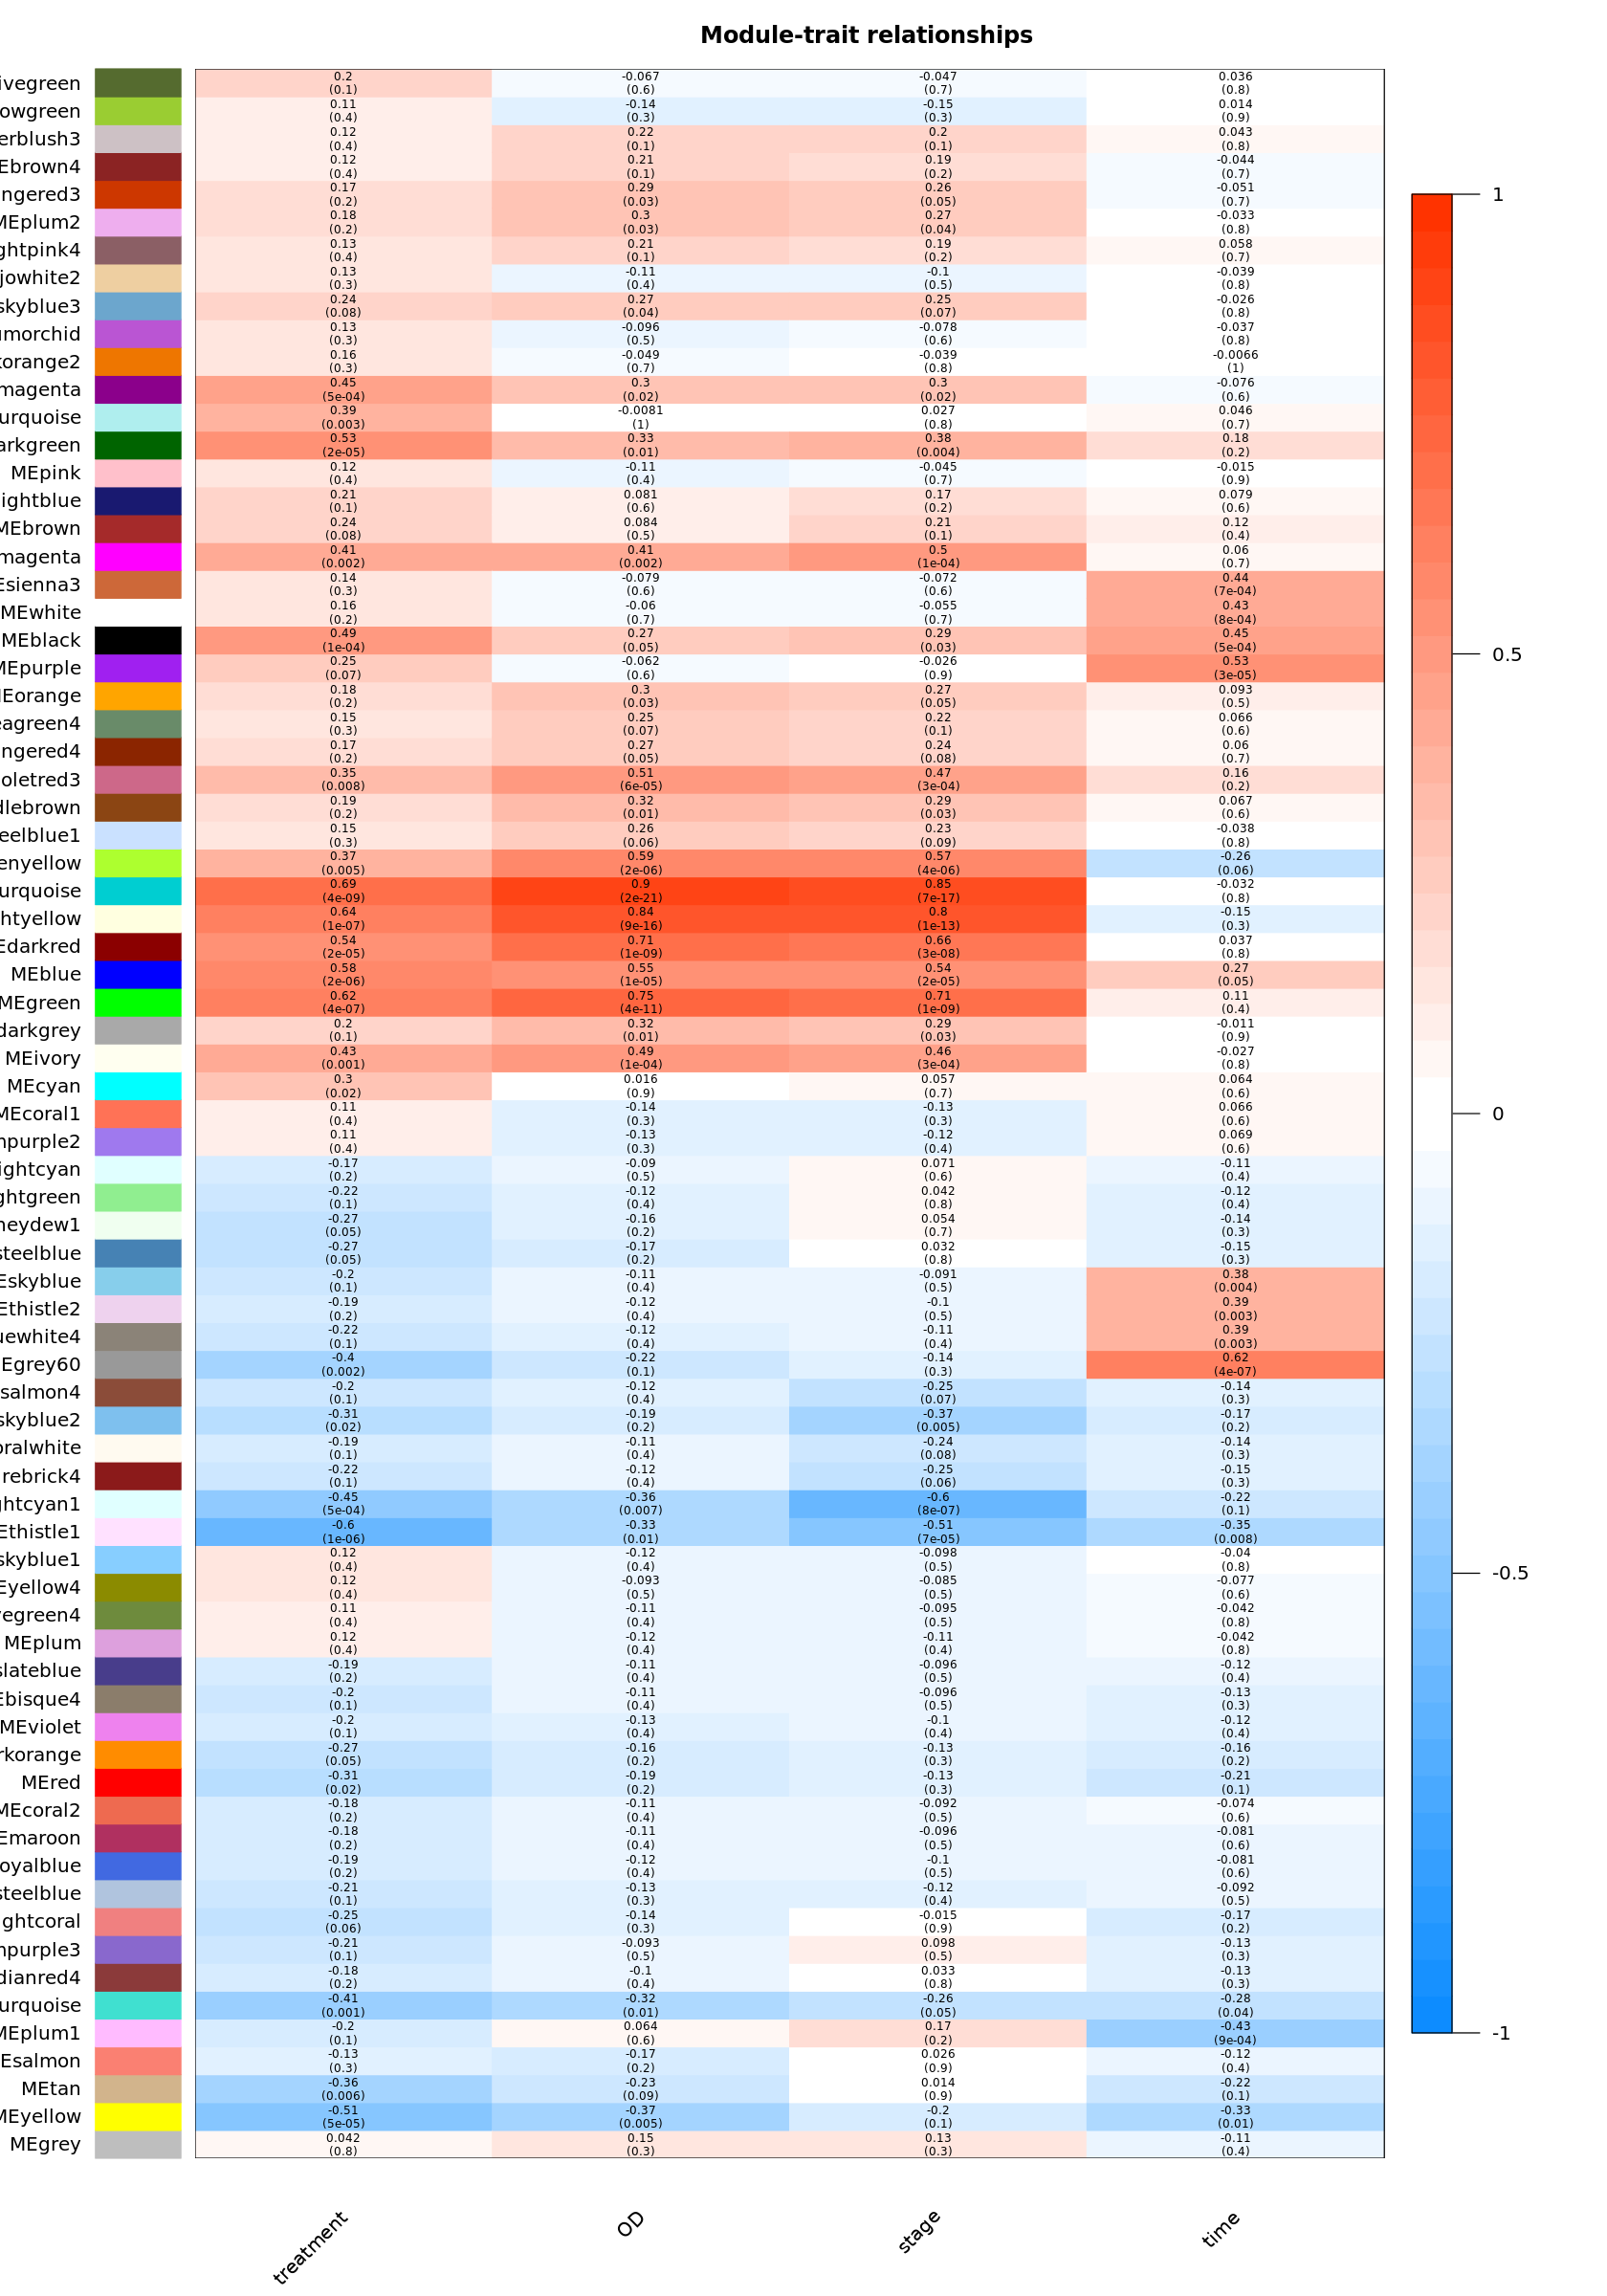

In [77]:
options(repr.plot.width=14, repr.plot.height=20)
# Will display correlations and their p-values
textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
                           signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(datTraits),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))

In [57]:
# Define variable weight containing the weight column of datTrait
treatment = as.data.frame(datTraits$treatment);
names(treatment) = "treatment"
# names (colors) of the modules
modNames = substring(names(MEs), 3)

geneModuleMembership = as.data.frame(cor(datExpr, MEs, use = "p"));
MMPvalue = as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples));

names(geneModuleMembership) = paste("MM", modNames, sep="");
names(MMPvalue) = paste("p.MM", modNames, sep="");

geneTraitSignificance = as.data.frame(cor(datExpr, treatment, use = "p"));
GSPvalue = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples));

names(geneTraitSignificance) = paste("GS.", names(treatment), sep="");
names(GSPvalue) = paste("p.GS.", names(treatment), sep="");

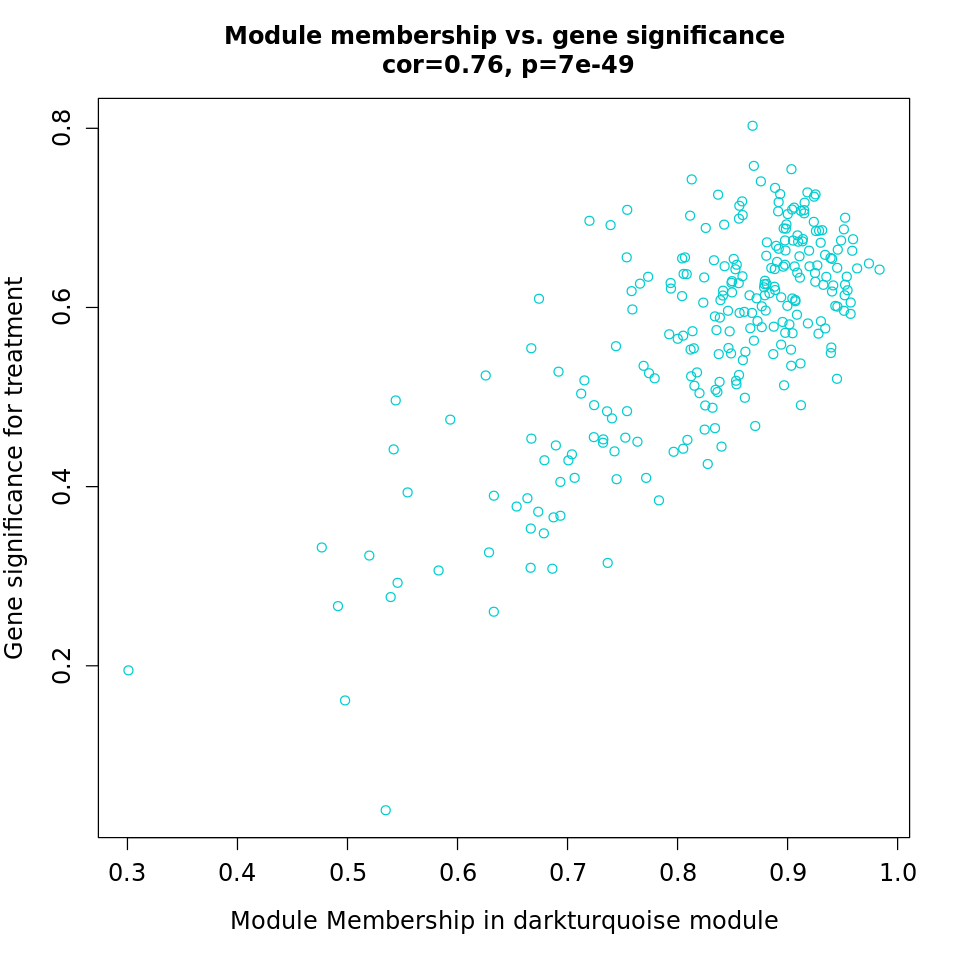

In [61]:
# floralwhite
module = "darkturquoise"
column = match(module, modNames);
moduleGenes = moduleColors==module;

options(repr.plot.width=8, repr.plot.height=8)
par(mfrow = c(1,1));
verboseScatterplot(abs(geneModuleMembership[moduleGenes, column]),
                   abs(geneTraitSignificance[moduleGenes, 1]),
                   xlab = paste("Module Membership in", module, "module"),
                   ylab = "Gene significance for treatment",
                   main = paste("Module membership vs. gene significance\n"),
                   cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2, col = module)

In [62]:
length(names(datExpr)[moduleColors=="darkturquoise"])

[1] 253

In [71]:
datExpr[moduleColors=="darkturquoise"]
write.csv(datExpr[moduleColors=="darkturquoise"], file = "module_darkturquoise.csv")

,AT1G01550.1,AT1G01560.1,AT1G02950.1,AT1G03220.1,AT1G03370.1,AT1G03730.1,AT1G07130.1,AT1G07240.1,AT1G08315.1,AT1G09575.1,⋯,AT5G60820.1,AT5G61210.1,AT5G62560.1,AT5G63320.1,AT5G64300.1,AT5G64870.1,AT5G65300.1,AT5G66480.1,AT5G66790.1,ATCG00790.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR11510194,203.34000,31.046700,3.2864200,352.73700,45.629000,20.48930,32.22250,37.39490,30.99110,1.227720,⋯,10.78650,207.0350,29.229600,35.303130,59.7143,5.408250,95.454200,7.496160,14.375100,1554.7800
SRR11510195,240.45810,57.961300,4.0045900,316.69200,55.432200,32.83810,50.47240,47.40110,29.15810,1.980010,⋯,10.18220,235.6060,38.503200,49.620980,69.2917,14.414700,152.526000,4.777570,18.899400,1247.7700
SRR11510196,182.96790,7.774850,0.4859460,217.02400,22.083600,18.53010,24.15840,35.48320,23.02600,1.062600,⋯,6.59085,137.4000,22.184700,23.663015,52.1454,3.219790,52.630800,1.384990,6.914120,2841.2800
SRR11934411,306.65610,77.395100,10.6975000,720.42400,87.093900,26.54890,34.22720,36.77060,43.16550,2.531490,⋯,13.24650,339.3550,34.954500,34.231075,84.0517,19.625000,82.840800,13.525400,24.163300,19.0011
SRR11934414,337.87900,87.125200,9.2402400,658.95300,116.075000,25.68160,46.98900,54.07250,42.35200,1.740460,⋯,16.19300,425.4370,38.568100,49.763289,110.7430,7.533970,105.227000,16.498200,26.767700,22.4532
SRR11934417,330.66200,91.541000,7.0351600,507.66400,118.451000,32.51630,58.31810,40.49670,31.71050,1.923830,⋯,11.07350,540.3710,46.929800,40.949097,117.7580,34.310200,115.955000,19.330600,29.587900,35.7390
SRR11934420,275.49480,86.070900,9.2917800,438.56800,77.622300,38.61780,29.12500,41.66530,41.03970,2.608690,⋯,14.79360,284.7690,37.025400,47.850530,108.6030,14.276700,92.205200,9.449780,21.272800,31.4104
SRR11934425,347.64350,40.998600,5.2794170,443.18900,106.538000,48.06150,63.96040,51.94000,49.07310,1.810850,⋯,15.53210,401.5210,51.924600,56.733455,161.0630,22.844100,85.661000,10.789700,45.065400,20.4689
SRR11934428,292.53110,138.883000,10.3995186,746.36400,112.145000,53.19380,45.61470,41.42570,59.97000,2.266000,⋯,13.21170,455.8210,38.065500,37.031040,151.2100,36.047500,121.720000,6.578220,33.509900,41.9006


In [63]:
annot = read.csv(file = "./data/GeneAnnotation.csv");
dim(annot)
names(annot)
probes = names(datExpr)
probes2annot = match(probes, annot$X)
# The following is the number or probes without annotation:
sum(is.na(probes2annot))
# Should return 0.

[1] 18427     3

[1] "X"           "LocusLinkID" "gene_symbol"

[1] 26923

In [64]:
# Create the starting data frame
geneInfo0 = data.frame(gene_id = probes,
                      geneSymbol = annot$gene_symbol[probes2annot],
                      LocusLinkID = annot$LocusLinkID[probes2annot],
                      moduleColor = moduleColors,
                      geneTraitSignificance,
                      GSPvalue)
# Order modules by their significance for weight
modOrder = order(-abs(cor(MEs, treatment, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership))
{
  oldNames = names(geneInfo0)
  geneInfo0 = data.frame(geneInfo0, geneModuleMembership[, modOrder[mod]], 
                         MMPvalue[, modOrder[mod]]);
  names(geneInfo0) = c(oldNames, paste("MM.", modNames[modOrder[mod]], sep=""),
                       paste("p.MM.", modNames[modOrder[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder = order(geneInfo0$moduleColor, -abs(geneInfo0$GS.treatment));
geneInfo = geneInfo0[geneOrder, ]

In [65]:
write.csv(geneInfo, file = "geneInfo.csv")

---------

# 4. Interfacing network analysis with other data such as functional annotation and gene ontology

In [39]:
# Read in the probe annotation
annot = read.csv(file = "./data/GeneAnnotation.csv");
# Match probes in the data set to the probe IDs in the annotation file 
probes = names(datExpr)
probes2annot = match(probes, annot$X)
# Get the corresponding Locuis Link IDs
allLLIDs = annot$LocusLinkID[probes2annot];
# $ Choose interesting modules
intModules = c("pink", "brown", "black")
for (module in intModules)
{
  # Select module probes
  modGenes = (moduleColors==module)
  # Get their entrez ID codes
  modLLIDs = allLLIDs[modGenes];
  # Write them into a file
  fileName = paste("LocusLinkIDs-", module, ".txt", sep="");
  write.table(as.data.frame(modLLIDs), file = fileName,
              row.names = FALSE, col.names = FALSE)
}
# As background in the enrichment analysis, we will use all probes in the analysis.
fileName = paste("LocusLinkIDs-all.txt", sep="");
write.table(as.data.frame(allLLIDs), file = fileName,
            row.names = FALSE, col.names = FALSE)

-------

# 6. Exporting network data to network visualization software

### 6.a Exporting to VisANT

In [66]:
# Recalculate topological overlap
# TOM = TOMsimilarityFromExpr(datExpr, power = 6);
# Read in the annotation file
annot = read.csv(file = "./data/GeneAnnotation.csv");
# Select module
module = "darkturquoise";
# Select module probes
probes = names(datExpr)
inModule = (moduleColors==module);
modProbes = probes[inModule];
# Select the corresponding Topological Overlap
modTOM = TOM[inModule, inModule];
dimnames(modTOM) = list(modProbes, modProbes)
vis = exportNetworkToVisANT(modTOM,
  file = paste("VisANTInput-", module, ".txt", sep=""),
  weighted = TRUE,
  threshold = 0)

In [74]:
nTop = 200;
IMConn = softConnectivity(datExpr[, modProbes]);
top = (rank(-IMConn) <= nTop)
vis = exportNetworkToVisANT(modTOM[top, top],
  file = paste("VisANTInput-", module, "-top30.txt", sep=""),
  weighted = TRUE,
  threshold = 0)

 softConnectivity: FYI: connecitivty of genes with less than 19 valid samples will be returned as NA.
 ..calculating connectivities.. 


Warning message in max(abs(adjMat - t(adjMat)), na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(adjMat, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(adjMat, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in matrix(c(1:nRow), nRow, nRow, byrow = TRUE):
“data length exceeds size of matrix”
Warning message in matrix(c(1:nRow), nRow, nRow):
“data length exceeds size of matrix”


In [68]:
nTop = 50;
IMConn = softConnectivity(datExpr[, modProbes]);
top = (rank(-IMConn) <= nTop)
vis = exportNetworkToVisANT(modTOM[top, top],
  file = paste("VisANTInput-", module, "-top50.txt", sep=""),
  weighted = TRUE,
  threshold = 0)

 softConnectivity: FYI: connecitivty of genes with less than 19 valid samples will be returned as NA.
 ..calculating connectivities.. 


In [69]:
nTop = 100;
IMConn = softConnectivity(datExpr[, modProbes]);
top = (rank(-IMConn) <= nTop)
vis = exportNetworkToVisANT(modTOM[top, top],
  file = paste("VisANTInput-", module, "-top100.txt", sep=""),
  weighted = TRUE,
  threshold = 0)

 softConnectivity: FYI: connecitivty of genes with less than 19 valid samples will be returned as NA.
 ..calculating connectivities.. 


In [63]:
modTOM

,AT1G02250,AT1G02510,AT1G02630,AT1G02670,AT1G02965,AT1G04610,AT1G05530,AT1G05920,AT1G06920,AT1G06925,⋯,AT5G52270,AT5G54067,AT5G58860,AT5G60470,AT5G60553,AT5G60810,AT5G61120,AT5G61690,AT5G61750,AT5G65274
AT1G02250,1.00000000,0.060539192,0.20301561,0.096048071,0.07160859,0.20779329,0.164650154,0.25970113,0.17203594,0.21646241,⋯,0.15576191,0.22242969,0.1945093,0.25150599,0.2547491,0.2547491,0.2547491,0.15603999,0.2547491,0.0486776495
AT1G02510,0.06053919,1.000000000,0.03831150,0.003146818,0.02146946,0.02020435,0.008529975,0.02798079,0.01982210,0.01966425,⋯,0.01919019,0.03508609,0.1144198,0.04598525,0.1652573,0.1652573,0.1652573,0.01751545,0.1652573,0.0009869314
AT1G02630,0.20301561,0.038311503,1.00000000,0.031664095,0.06923716,0.11430061,0.099156201,0.15086491,0.09994723,0.11195727,⋯,0.06510987,0.13837761,0.3912124,0.15607493,0.5545610,0.5545610,0.5545610,0.10000888,0.5545610,0.0281211565
AT1G02670,0.09604807,0.003146818,0.03166409,1.000000000,0.01789790,0.01548392,0.005883487,0.02270844,0.02445467,0.01553154,⋯,0.04428402,0.04064361,0.1162277,0.03544010,0.1329150,0.1329150,0.1329150,0.01640653,0.1329150,0.0009437070
AT1G02965,0.07160859,0.021469465,0.06923716,0.017897898,1.00000000,0.06654002,0.057558503,0.08800931,0.06207835,0.06468705,⋯,0.03323234,0.07565188,0.1328942,0.09166902,0.1830448,0.1830448,0.1830448,0.05161009,0.1830448,0.0737274430
AT1G04610,0.20779329,0.020204347,0.11430061,0.015483920,0.06654002,1.00000000,0.057648200,0.09126004,0.06590676,0.07666980,⋯,0.06793864,0.07358896,0.3787212,0.15105338,0.5337773,0.5337773,0.5337773,0.05200306,0.5337773,0.0170468197
AT1G05530,0.16465015,0.008529975,0.09915620,0.005883487,0.05755850,0.05764820,1.000000000,0.07868962,0.05569799,0.05389412,⋯,0.05209702,0.05408105,0.3419633,0.13110443,0.4642776,0.4642776,0.4642776,0.04462408,0.4642776,0.0079876899
AT1G05920,0.25970113,0.027980790,0.15086491,0.022708438,0.08800931,0.09126004,0.078689624,1.00000000,0.10348800,0.08927723,⋯,0.08238798,0.10427590,0.4967020,0.20227011,0.7105682,0.7105682,0.7105682,0.07028682,0.7105682,0.0203443765
AT1G06920,0.17203594,0.019822100,0.09994723,0.024454668,0.06207835,0.06590676,0.055697992,0.10348800,1.00000000,0.06438482,⋯,0.05445247,0.07446323,0.3323092,0.13623530,0.4699523,0.4699523,0.4699523,0.05056123,0.4699523,0.0161294358
AT1G06925,0.21646241,0.019664246,0.11195727,0.015531539,0.06468705,0.07666980,0.053894121,0.08927723,0.06438482,1.00000000,⋯,0.07486806,0.07145355,0.3723768,0.14664590,0.5194765,0.5194765,0.5194765,0.05107424,0.5194765,0.0254804692
